https://arxiv.org/pdf/1702.01788

In [ ]:
import numpy as np
import h5py
import yt
import numpy as np
import matplotlib.pyplot as plt
import sys, platform, os
from CosmoUtils import *
from yt.extensions.astro_analysis.halo_analysis import HaloCatalog
from tqdm import tqdm

In [ ]:
import my_hmf_cmf_lib as mycmf

In [ ]:
plt.style.use('stylesheet.mplstyle')

In [ ]:
nb_iter, zsnap = ["0002850",0.0]

H0org=69.5 # km/s/Mpc
om=0.285 # total density parameter
ob=0.0049
ns = 0.9632
s8 = 0.828
# Computing the Particl Mass
H0=H0org*1e3/3.086e22
h=H0org/100.
rhoc=3*H0**2/(8*np.pi*6.67e-11) #kg/m^3
rho0 = rhoc * om
# mpart=rho0*(L/h*3.086e22)**3/Npart #kg #either rhoc * om or rho0

In [ ]:
pars,results,s8_fid = mycmf.compute_init_power_spectrum(zsnap, H0org, mycmf.TCMB, om, ob, h, ns, mycmf.As)

In [ ]:
print(s8_fid)

In [23]:
#compute the power spectrum for a given redshift
kh, _, pk = mycmf.compute_matter_power_spectrum(zsnap, pars, s8_fid, ns=ns, s8=s8)

In [24]:
def R_to_Q(R, delta_NL):
    '''
    Both in Mpc/h
    '''
    res = R * (1+delta_NL)**(1/3)
    return res

def Q_to_R(Q, delta_NL):
    '''
    Both in Mpc/h
    '''
    res = Q / (1+delta_NL)**(1/3)
    return res

In [31]:
from scipy.optimize import root_scalar


def compute_delta_NL(delta_L):
    def func(delta_NL):
        return mycmf.compute_delta_linear(delta_NL) - delta_L
    
    sol = root_scalar(func, bracket=[-0.99, 100], method='brentq') 
    if sol.converged:
        return sol.root
    else:
        return None

In [34]:
def f(R, delta_L, delta_NL, M_list, xmin, xmax, ymin, ymax, fig_nb):

    dn_dm = [mycmf.cmfcalc(M_list[i], kh, pk, R, delta_L, delta_NL, "cST") for i in range(len(M_list))]
    dn_dm = np.array(dn_dm)

    n_m = [dn_dm[i]*(M_list[i+1]-M_list[i-1]) for i in range(1,len(M_list)-1)]
    n_m = np.array(n_m)

    plt.loglog(M_list[1:-1], n_m, '-o', markersize=3, color="darkgreen", label=f"cST R={R} Mpc/h $\delta_L$={delta_L}")
    plt.title(f"Reproduction of Fig.{fig_nb} of Tramonte et al. (2017) [M has {len(M_list)} bins]")
    plt.xlabel(r"$M\ [h^{-1}M_\odot]$")
    plt.ylabel(r"$n(M)\ [Mpc^{-3} h^3]$")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.legend()
    plt.show()

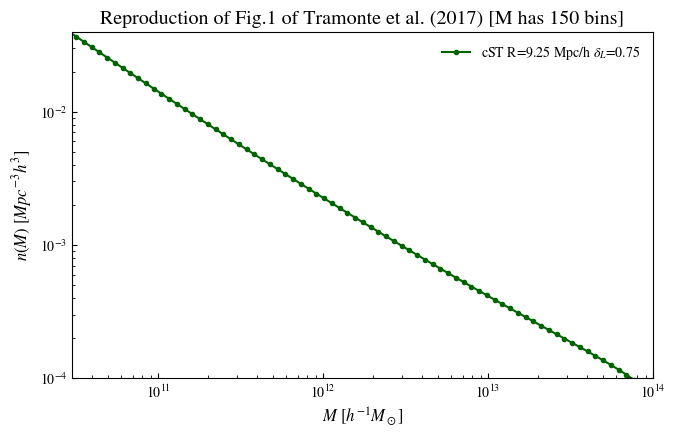

good


In [40]:
# R=9.25
# delta_L=0.75

# xmin, xmax = 3e10, 1e14
# ymin, ymax = 1e-4, 4e-2

Mmin = 9
Mmax = 16
Mbin = 150

M_list = np.logspace(Mmin, Mmax, Mbin)

f(9.25, 0.75, compute_delta_NL(0.75), M_list, 3e10, 1e14, 1e-4, 4e-2, 1)
print("good")

/home/mesquita/stage/my_hmf_cmf_lib.py:313: RuntimeWarning: invalid value encountered in double_scalars
  third_term = np.abs(T_res)


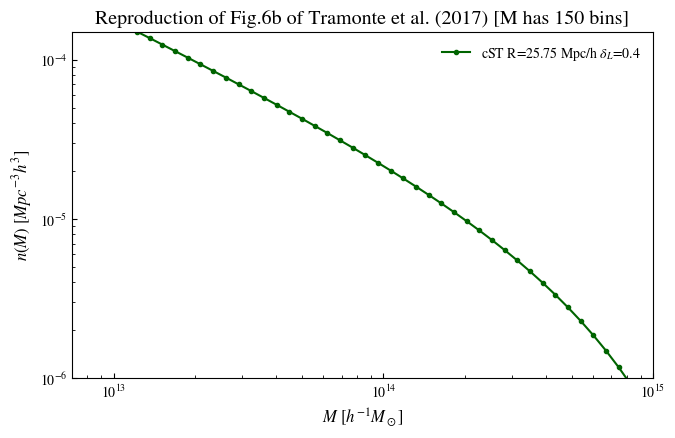

not good


In [41]:
f(25.75, 0.4,compute_delta_NL(0.4),M_list, 7e12, 1e15, 1e-6, 1.5e-4 ,"6b")
print("not good")

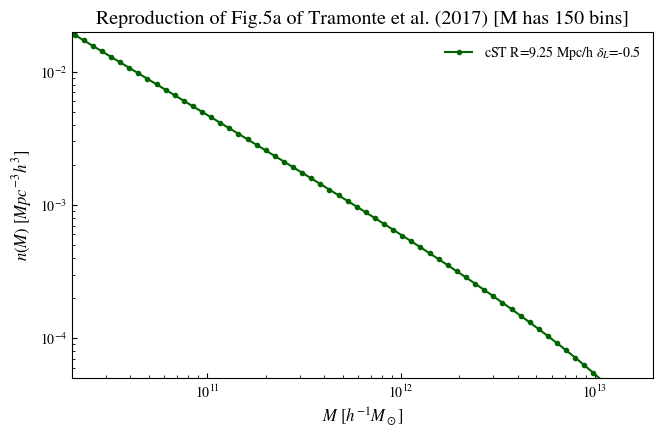

not good


In [43]:
f(9.25,-0.5,compute_delta_NL(-0.5) ,M_list, 2e10, 2e13, 5e-5, 2e-2 ,"5a")
print("not good")

In [ ]:
M_list = np.logspace(10,13,10)
print(f"{M_list[0]:.2e}, {M_list[-1]:.2e}")
f(9.25,-2.3, np.logspace(10.477, 12.8, 17), 3e10, 4.5e12, 2e-5, 5e-3,"7a")

In [ ]:
R = 9.25
delta_L = -2.3
Mmin =  10.35
Mmax=  12.8
Mbin =  20
xmin = 3e10
xmax = 4.5e12
ymin= 2e-5
ymax = 5e-3
fig_nb = "7a"

M_list = np.logspace(Mmin,Mmax,Mbin) #Msun/h

dn_dm = [mycmf.cmfcalc(M_list[i], kh, pk, R, delta_L, "cST") for i in range(len(M_list))]
dn_dm = np.array(dn_dm)

n_m = [dn_dm[i]*(M_list[i+1]-M_list[i-1]) for i in range(1,len(M_list)-1)]
n_m = np.array(n_m)

plt.figure(figsize=(6,4))
plt.loglog(M_list[1:-1], n_m, '-o', markersize=3, color="darkgreen", label=f"cST R={R} Mpc/h $\delta_L$={delta_L}")
plt.title(f"Reproduction of Fig.{fig_nb} of Tramonte et al. (2017) [M=np.logspace({Mmin},{Mmax},{Mbin}) $h^{{-1}}M_\odot$]", fontsize=10)
plt.xlabel(r"$M\ [h^{-1}M_\odot]$")
plt.ylabel(r"$n(M)\ [Mpc^{-3} h^3]$")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.legend()
plt.show()

In [ ]:
f(25.75, -0.3, 12, 15, 150, 7e12, 3e14, 2e-7, 6e-5, "5d")